In [1]:
import sys
sys.path.append("/Users/shavindra/Documents/Personal/MLQS/MLQS/combined_model")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import butter, filtfilt
import zipfile
import os
import json
from pathlib import Path
from analysis import CaffeineAnalyzer

In [2]:
from analyze import CaffeineAnalyzer

In [ ]:
# Example: parameterize your zip file list for Timo's data
zip_files = {
    'base_2025-06-06': 'base 2025-06-06 15-45-11.zip',
    'base_2025-06-07': 'base 2025-06-07 12-17-44.zip', 
    '200ml_2025-06-07': '200 ml 2025-06-07 12-52-34.zip',
    '230ml_2025-06-06': '230ml 2025-06-06 16-22-45.zip'
}
data_path = "/Users/shavindra/Documents/Personal/MLQS/MLQS/data/Timo"
analyzer = CaffeineAnalyzer(data_path=data_path, zip_files=zip_files)
analyzer.extract_and_load_data()
analyzer.explore_data_structure()


Loading base_2025-06-06 from base 2025-06-06 15-45-11.zip
  Files in base 2025-06-06 15-45-11.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loaded Accelerometer.csv as CSV: shape (14506, 4)
      Loaded Gyroscope.csv as CSV: shape (14471, 4)
      Loaded Linear Acceleration.csv as CSV: shape (7236, 4)

Loading base_2025-06-07 from base 2025-06-07 12-17-44.zip
  Files in base 2025-06-07 12-17-44.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loaded Accelerometer.csv as CSV: shape (16356, 4)
      Loaded Gyroscope.csv as CSV: shape (16322, 4)
      Loaded Linear Acceleration.csv as CSV: shape (8161, 4)

Loading 200ml_2025-06-07 from 200 ml 2025-06-07 12-52-34.zip
  Files in 200 ml 2025-06-07 12-52-34.zip:
    - Accelerometer.csv
    - Gyroscope.csv
    - Linear Acceleration.csv
    - meta/device.csv
    - meta/time.csv
      Loa


TREMOR COMPARISON ANALYSIS
Baseline files: {'Linear Acceleration.csv', 'Gyroscope.csv', 'Accelerometer.csv'}
Caffeine files: {'Linear Acceleration.csv', 'Gyroscope.csv', 'Accelerometer.csv'}

Analyzing: Accelerometer.csv
    Analyzing columns: ['Acceleration_x_m/s^2', 'Acceleration_y_m/s^2', 'Acceleration_z_m/s^2']
    Analyzing columns: ['Acceleration_x_m/s^2', 'Acceleration_y_m/s^2', 'Acceleration_z_m/s^2']
    Analyzing columns: ['Acceleration_x_m/s^2', 'Acceleration_y_m/s^2', 'Acceleration_z_m/s^2']
    Analyzing columns: ['Acceleration_x_m/s^2', 'Acceleration_y_m/s^2', 'Acceleration_z_m/s^2']
    Acceleration_z_m/s^2_cv:
      Baseline: 0.046564
      Caffeine: 0.058696
      Change: +26.06%
    Acceleration_y_m/s^2_std:
      Baseline: 0.677520
      Caffeine: 0.632075
      Change: -6.71%
    Acceleration_y_m/s^2_rms:
      Baseline: 0.798977
      Caffeine: 0.898342
      Change: +12.44%
    Acceleration_y_m/s^2_mad:
      Baseline: 0.353532
      Caffeine: 0.354696
      Chan

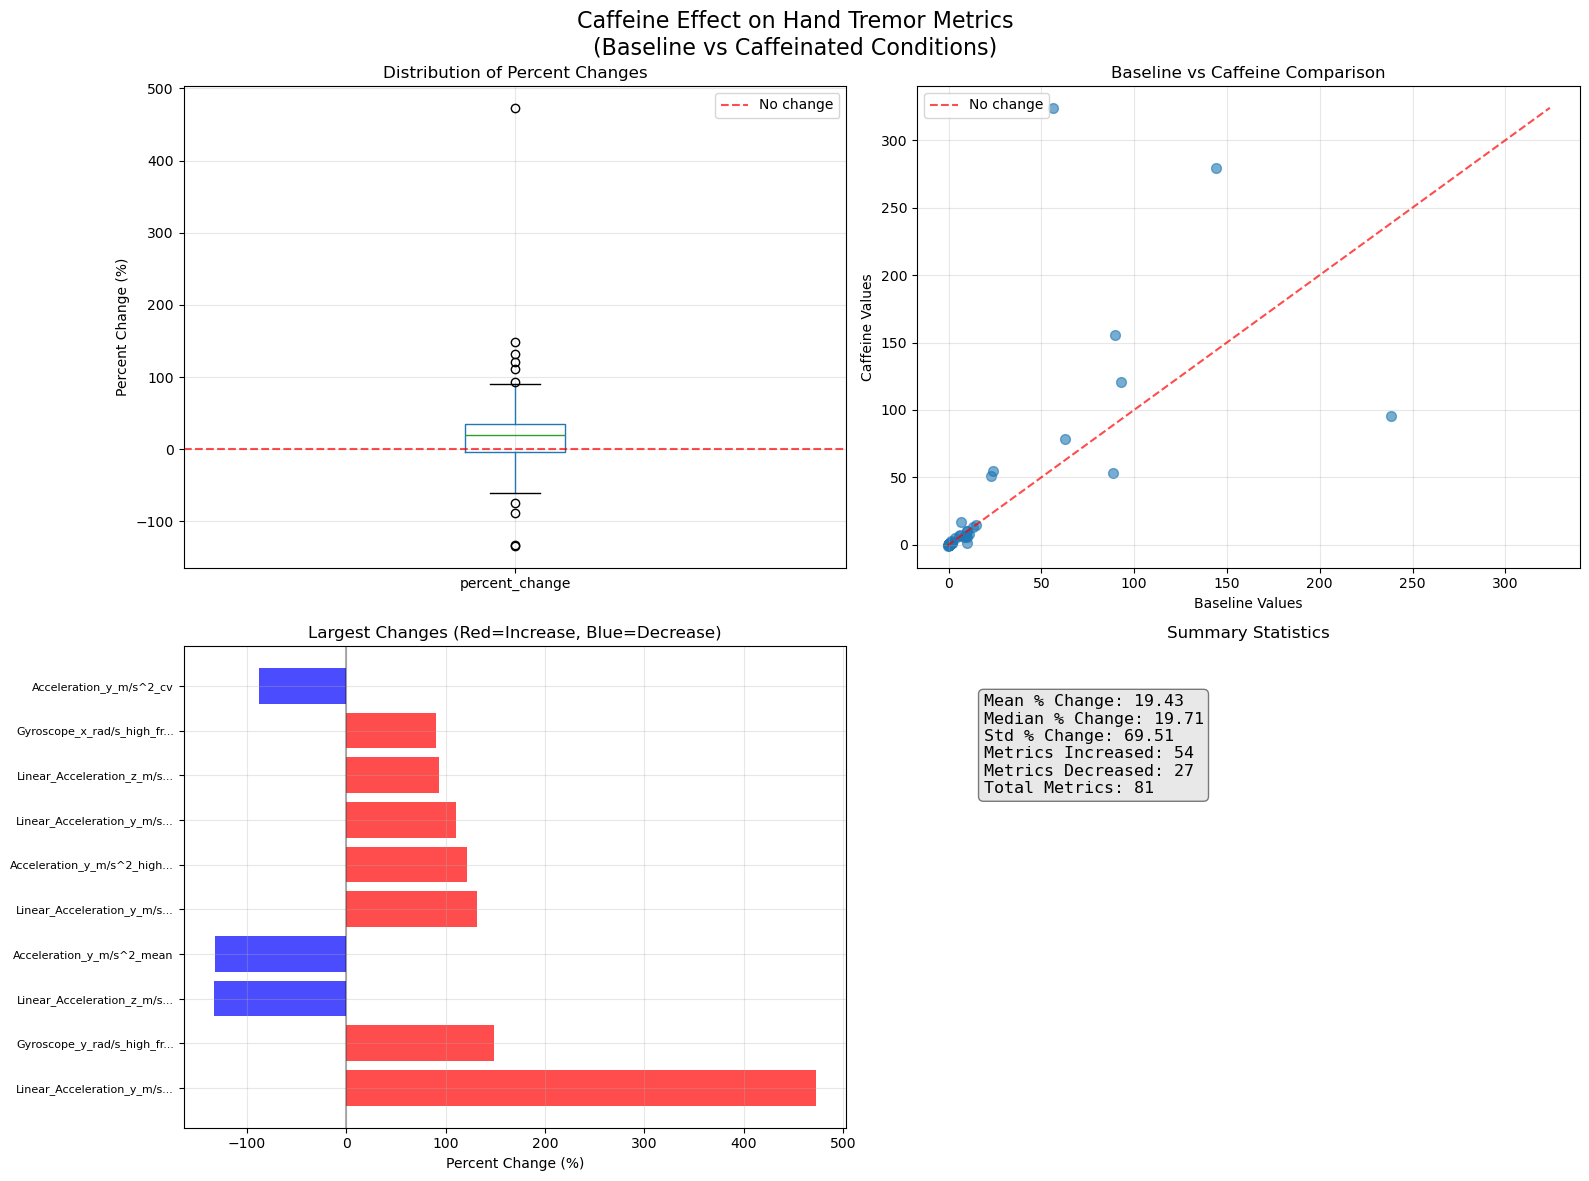


ANALYSIS SUMMARY
QUANTITATIVE RESULTS:
   Total metrics analyzed: 81
   Metrics increased: 54 (66.7%)
   Metrics decreased: 27 (33.3%)
   Average change: +19.43%
   Median change: +19.71%
   Standard deviation: 69.51%
TOP INCREASES:
   Linear_Acceleration_y_m/s^2_cv: +473.2%
   Gyroscope_y_rad/s_high_freq_energy: +149.0%
   Linear_Acceleration_y_m/s^2_high_freq_energy: +131.9%
TOP DECREASES:
   Linear_Acceleration_z_m/s^2_mean: -133.5%
   Acceleration_y_m/s^2_mean: -132.0%
   Acceleration_y_m/s^2_cv: -88.0%
INTERPRETATION:
STRONG SIGNAL: Average change of +19.4% suggests caffeine has a detectable effect on tremor metrics.
High variability (69.5%) suggests heterogeneous effects across different metrics or measurement conditions.


In [7]:
results = analyzer.compare_conditions()
if results:
    print(f"\nCreating visualizations...")
    df_metrics = analyzer.visualize_results(results)
    analyzer.generate_summary_report(results, df_metrics)

In [9]:
# Nathaniel's actual files (update to match real filenames)
zip_files_nathaniel = {
    'no_caffeine': 'No_caffeine-2025-06-04_13-45-27.zip',
    'caffeine': '30min_20mg_caffeine-2025-06-04_14-17-49.zip'
}
data_path_nathaniel = "/Users/shavindra/Documents/Personal/MLQS/MLQS/data/Nathaniel"
analyzer_nathaniel = CaffeineAnalyzer(data_path=data_path_nathaniel, zip_files=zip_files_nathaniel)
analyzer_nathaniel.extract_and_load_data()
analyzer_nathaniel.explore_data_structure()

results_nathaniel = analyzer_nathaniel.compare_conditions()
if results_nathaniel:
    print(f"\nCreating visualizations for Nathaniel...")
    df_metrics_nathaniel = analyzer_nathaniel.visualize_results(results_nathaniel)
    analyzer_nathaniel.generate_summary_report(results_nathaniel, df_metrics_nathaniel)


Loading no_caffeine from No_caffeine-2025-06-04_13-45-27.zip
  Files in No_caffeine-2025-06-04_13-45-27.zip:
    - Metadata.csv
    - HeartRate.csv
    - WatchBarometer.csv
    - Annotation.csv
    - WatchOrientation.csv
    - WatchAccelerometer.csv
    - WatchGravity.csv
    - WatchGyroscope.csv
    - WatchTotalAcceleration.csv
      Loaded WatchAccelerometer.csv as CSV: shape (2231, 5)
      Loaded WatchGyroscope.csv as CSV: shape (2289, 5)

Loading caffeine from 30min_20mg_caffeine-2025-06-04_14-17-49.zip
  Files in 30min_20mg_caffeine-2025-06-04_14-17-49.zip:
    - HeartRate.csv
    - Metadata.csv
    - WatchBarometer.csv
    - Annotation.csv
    - WatchOrientation.csv
    - WatchAccelerometer.csv
    - WatchGravity.csv
    - WatchGyroscope.csv
    - WatchTotalAcceleration.csv
      Loaded WatchAccelerometer.csv as CSV: shape (1100, 5)
      Loaded WatchGyroscope.csv as CSV: shape (1123, 5)

Data loading summary:
Baseline sessions: 0
Caffeine sessions: 2
Total sessions: 2

DATA ST